In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [3]:
raw_dat = pd.read_excel("../data/raw_data.xlsx")
raw_dat['Normalized'] = (raw_dat['mkt_r'] - raw_dat['dep_f_r'])/(raw_dat['len_f_r'] - raw_dat['dep_f_r'])
dat = raw_dat.drop(columns=['mkt_r', 'dep_f_r', 'len_f_r'])
dat.to_csv("../data/reserve_demand_cruve_data.csv", index=False)

In [22]:
import reserves_demand.curve_fit as cf
import imp; imp.reload(cf)
obj = cf.CurveFitter(
    data = dat[['Normalized', 'excess_reserve']], 
    dep_var = 'Normalized',
    main_indep_var= 'excess_reserve',
    dep_var_name= 'Normalized Overnight Rate',                 
    main_indep_var_name= 'Excess Reserve',
    constant = True,
    Q = 0.9,
    nFolds=5,
    parallel=True,
    search_method = 'all_combinations'
)

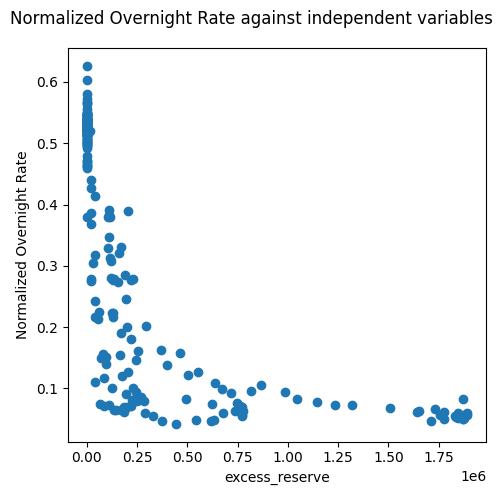

In [12]:
_ = obj.plot_x_y()

Running cross-validation for logistic curve


100%|██████████| 3/3 [00:00<00:00,  3.82 it/s]

Best combination for logistic: ['constant', 'excess_reserve']
Training Metrics:
RMSE         0.063007
MAE          0.039850
MAPE        22.623763
R2           0.904188
MSLE         0.002583
MedianAE     0.019376
dtype: float64

Validation Metrics:
RMSE         0.063639
MAE          0.040902
MAPE        23.553501
R2           0.898476
MSLE         0.002695
MedianAE     0.022000
dtype: float64


Running cross-validation for redLogistic curve



100%|██████████| 3/3 [00:00<00:00,  3.57 it/s]

Best combination for redLogistic: ['constant', 'excess_reserve']
Training Metrics:
RMSE         0.066461
MAE          0.041475
MAPE        23.331475
R2           0.893261
MSLE         0.002897
MedianAE     0.018798
dtype: float64

Validation Metrics:
RMSE         0.068222
MAE          0.043616
MAPE        25.670271
R2           0.882589
MSLE         0.003167
MedianAE     0.021396
dtype: float64


Running cross-validation for fixLogistic curve



100%|██████████| 3/3 [00:00<00:00,  4.33 it/s]

Best combination for fixLogistic: ['constant', 'excess_reserve']
Training Metrics:
RMSE         0.066600
MAE          0.041478
MAPE        23.027963
R2           0.892804
MSLE         0.002914
MedianAE     0.018667
dtype: float64

Validation Metrics:
RMSE         0.068073
MAE          0.043457
MAPE        25.178303
R2           0.882568
MSLE         0.003164
MedianAE     0.021368
dtype: float64


Running cross-validation for doubleExp curve



100%|██████████| 3/3 [00:01<00:00,  2.98 it/s]

Best combination for doubleExp: ['excess_reserve']
Training Metrics:
RMSE         0.066233
MAE          0.041193
MAPE        23.112493
R2           0.893982
MSLE         0.002875
MedianAE     0.019028
dtype: float64

Validation Metrics:
RMSE         0.068159
MAE          0.043356
MAPE        25.455603
R2           0.883165
MSLE         0.003148
MedianAE     0.021491
dtype: float64


Running cross-validation for exponential curve



100%|██████████| 3/3 [00:00<00:00,  3.61 it/s]

Best combination for exponential: ['constant', 'excess_reserve']
Training Metrics:
RMSE         0.067730
MAE          0.042059
MAPE        23.933395
R2           0.889059
MSLE         0.003007
MedianAE     0.018559
dtype: float64

Validation Metrics:
RMSE         0.069475
MAE          0.044295
MAPE        26.506379
R2           0.877538
MSLE         0.003292
MedianAE     0.021691
dtype: float64


Running cross-validation for fixExponential curve



100%|██████████| 3/3 [00:00<00:00,  5.61 it/s]

Best combination for fixExponential: ['constant', 'excess_reserve']
Training Metrics:
RMSE         0.076338
MAE          0.053387
MAPE        42.368212
R2           0.859191
MSLE         0.004017
MedianAE     0.039741
dtype: float64

Validation Metrics:
RMSE         0.077283
MAE          0.055486
MAPE        44.357255
R2           0.850583
MSLE         0.004243
MedianAE     0.040264
dtype: float64


Running cross-validation for arctan curve



100%|██████████| 3/3 [00:01<00:00,  2.51 it/s]

Best combination for arctan: ['excess_reserve']
Training Metrics:
RMSE         0.065683
MAE          0.040136
MAPE        21.418582
R2           0.895808
MSLE         0.002823
MedianAE     0.018379
dtype: float64

Validation Metrics:
RMSE         0.066173
MAE          0.041066
MAPE        22.225606
R2           0.890286
MSLE         0.002924
MedianAE     0.019746
dtype: float64


Running cross-validation for linear curve



100%|██████████| 3/3 [00:00<00:00,  4.22 it/s]


Best combination for linear: ['constant', 'excess_reserve']
Training Metrics:
RMSE          0.173458
MAE           0.125050
MAPE        116.983140
R2            0.275553
MSLE          0.018699
MedianAE      0.057547
dtype: float64

Validation Metrics:
RMSE          0.173106
MAE           0.126686
MAPE        118.733687
R2            0.259527
MSLE          0.014952
MedianAE      0.062436
dtype: float64


Best curve based on Validation RMSE: logistic curve


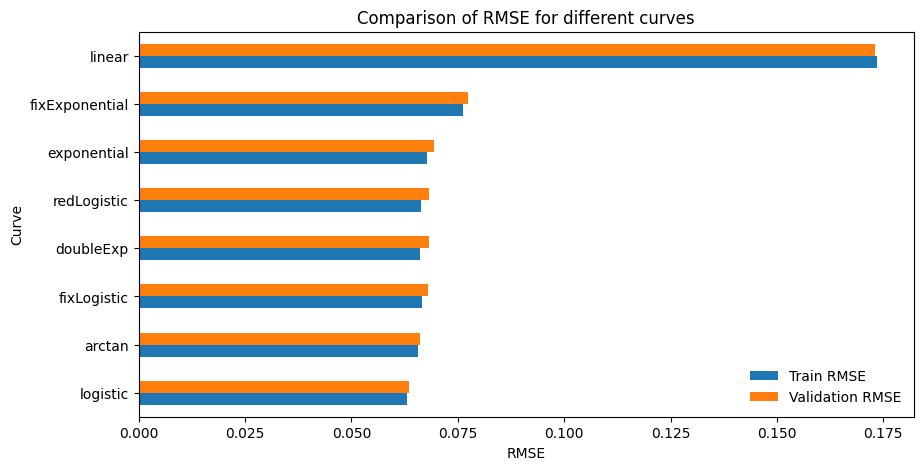

Curve,logistic,redLogistic,fixLogistic,doubleExp,exponential,fixExponential,arctan,linear
Best Combination,"[constant, excess_reserve]","[constant, excess_reserve]","[constant, excess_reserve]",[excess_reserve],"[constant, excess_reserve]","[constant, excess_reserve]",[excess_reserve],"[constant, excess_reserve]"
Train RMSE,0.063007,0.066461,0.0666,0.066233,0.06773,0.076338,0.065683,0.173458
Train MAE,0.03985,0.041475,0.041478,0.041193,0.042059,0.053387,0.040136,0.12505
Train MAPE,22.623763,23.331475,23.027963,23.112493,23.933395,42.368212,21.418582,116.98314
Train R2,0.904188,0.893261,0.892804,0.893982,0.889059,0.859191,0.895808,0.275553
Train MSLE,0.002583,0.002897,0.002914,0.002875,0.003007,0.004017,0.002823,0.018699
Train MedianAE,0.019376,0.018798,0.018667,0.019028,0.018559,0.039741,0.018379,0.057547
Validation RMSE,0.063639,0.068222,0.068073,0.068159,0.069475,0.077283,0.066173,0.173106
Validation MAE,0.040902,0.043616,0.043457,0.043356,0.044295,0.055486,0.041066,0.126686
Validation MAPE,23.553501,25.670271,25.178303,25.455603,26.506379,44.357255,22.225606,118.733687


In [23]:
best_curve, cv_result = obj.variable_select(on='RMSE', verbose=True, plot=True)
cv_result.set_index('Curve').T

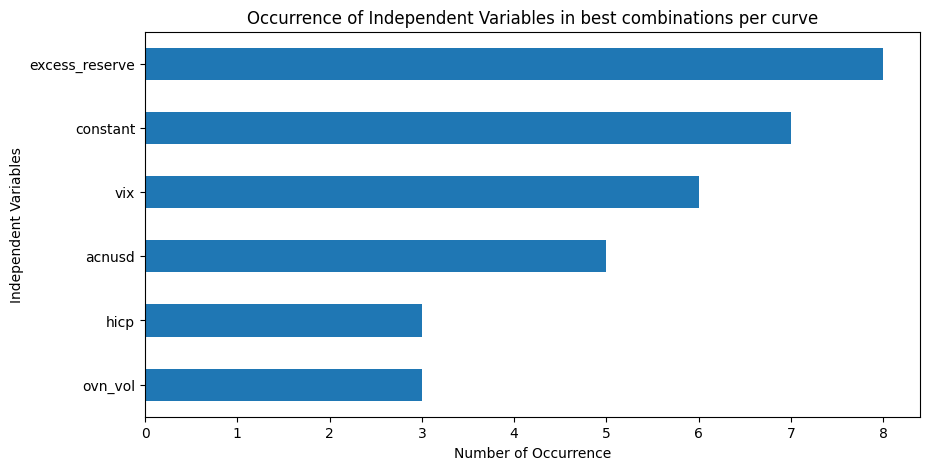

ovn_vol           3
hicp              3
acnusd            5
vix               6
constant          7
excess_reserve    8
dtype: int64

In [7]:
obj.indep_vars_occurence(normalize=False)

In [8]:
best_params = obj.fit_best_curves()

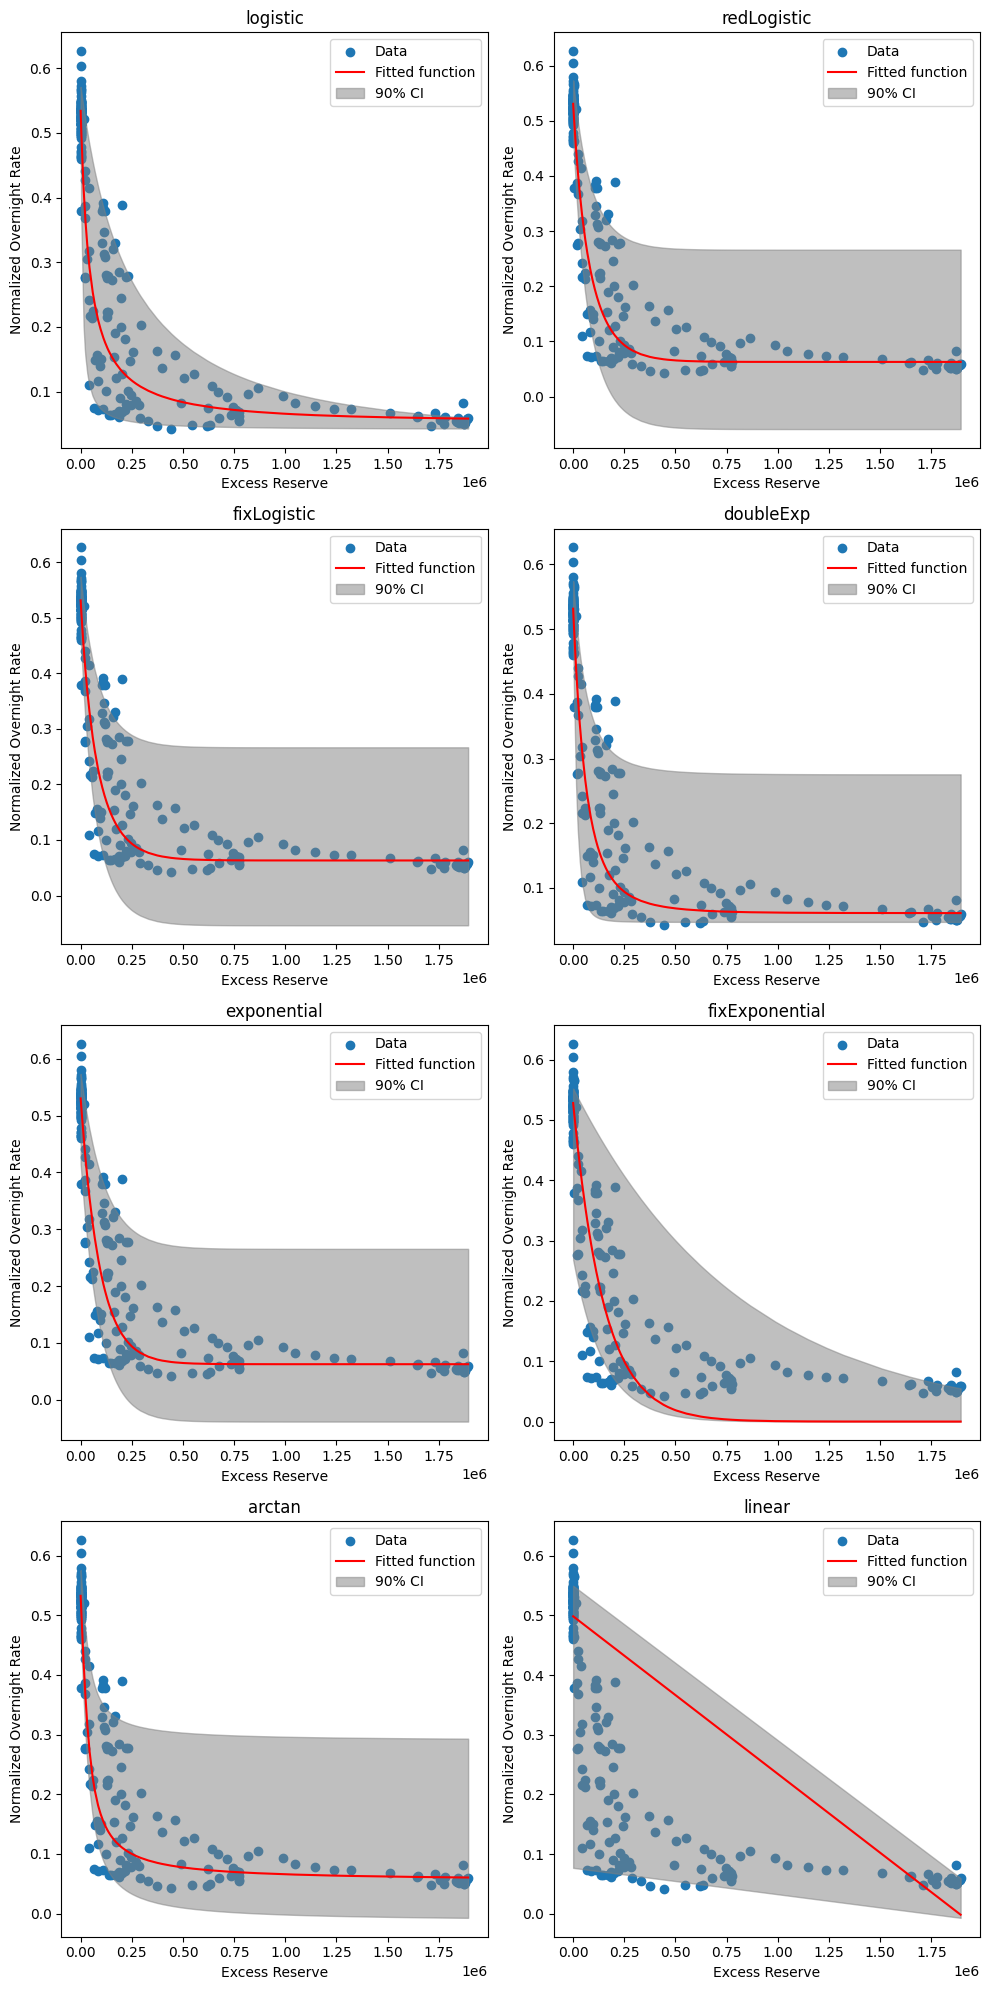

In [24]:
perf_metrics_df, predictions_df, param_df = obj.compare_best_curves(CI = True)

In [25]:
forecast_input = dat.tail(2).drop(columns=['Normalized'])
forecast_output = obj.predict_best_curve('exponential', X=forecast_input)
forecast_output

,constant,excess_reserve,ypred,ypred_upper,ypred_lower
228,1,0.927163,0.06266,-0.038229,0.265521
229,1,0.903887,0.06266,-0.038229,0.265521
